In [1]:
import requests 


url = 'http://api.opendatanetwork.com/data/v1/values?variable=economy.cost_of_living.index&entity_id=0400000US37&app_token=pZkfBdEiZbI2gLPXFZoMFw90c'



In [2]:
years = [2008,2009,2010,2011,2012,2013,2014,2015,2016]

In [3]:
cog_all = []
cog_goods = []
cog_other = []
cog_rent = []

In [4]:
for year in years:
    response = requests.get(url +"&year=" + str(year)).json()
    cog_all.append(response['data'][1])
    cog_goods.append(response['data'][2])
    cog_other.append(response['data'][3])
    cog_rent.append(response['data'][4])

#response   
#cog_all

In [ ]:
#dont run
goods = []


for good in cog_goods:
    goods.append(good[1])

goods

In [5]:
goodsLC = [good[1] for good in cog_goods]
goodsLC

[92, 92.1, 91.3, 91.5, 91.7, 91.8, 91.4, 91.1, 90.9]

In [6]:
allLC = [item[1] for item in cog_all]
allLC

[92, 92.1, 91.3, 91.5, 91.7, 91.8, 91.4, 91.1, 90.9]

In [7]:
otherLC = [other[1] for other in cog_other]
otherLC

[92, 92.1, 91.3, 91.5, 91.7, 91.8, 91.4, 91.1, 90.9]

In [8]:
rentLC = [rent[1] for rent in cog_rent]
rentLC

[92, 92.1, 91.3, 91.5, 91.7, 91.8, 91.4, 91.1, 90.9]

In [9]:
cost_of_living_dict = {
    "Year": years,
    "Cost of Living": allLC,
    "Cost of Goods": goodsLC,
    "Cost of Other": otherLC,
    "Cost of Rent": rentLC
}
cost_of_living_dict

{'Year': [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
 'Cost of Living': [92, 92.1, 91.3, 91.5, 91.7, 91.8, 91.4, 91.1, 90.9],
 'Cost of Goods': [92, 92.1, 91.3, 91.5, 91.7, 91.8, 91.4, 91.1, 90.9],
 'Cost of Other': [92, 92.1, 91.3, 91.5, 91.7, 91.8, 91.4, 91.1, 90.9],
 'Cost of Rent': [92, 92.1, 91.3, 91.5, 91.7, 91.8, 91.4, 91.1, 90.9]}

In [10]:
import pandas as pd

In [11]:
cost_of_living = pd.DataFrame(cost_of_living_dict)
cost_of_living

,Year,Cost of Living,Cost of Goods,Cost of Other,Cost of Rent
0,2008,92.0,92.0,92.0,92.0
1,2009,92.1,92.1,92.1,92.1
2,2010,91.3,91.3,91.3,91.3
3,2011,91.5,91.5,91.5,91.5
4,2012,91.7,91.7,91.7,91.7
5,2013,91.8,91.8,91.8,91.8
6,2014,91.4,91.4,91.4,91.4
7,2015,91.1,91.1,91.1,91.1
8,2016,90.9,90.9,90.9,90.9


In [16]:
cost_of_living = cost_of_living.set_index("Year")
cost_of_living

,Cost of Living,Cost of Goods,Cost of Other,Cost of Rent
Year,,,,
2008,92.0,92.0,92.0,92.0
2009,92.1,92.1,92.1,92.1
2010,91.3,91.3,91.3,91.3
2011,91.5,91.5,91.5,91.5
2012,91.7,91.7,91.7,91.7
2013,91.8,91.8,91.8,91.8
2014,91.4,91.4,91.4,91.4
2015,91.1,91.1,91.1,91.1
2016,90.9,90.9,90.9,90.9


In [13]:
%matplotlib notebook

In [14]:
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>


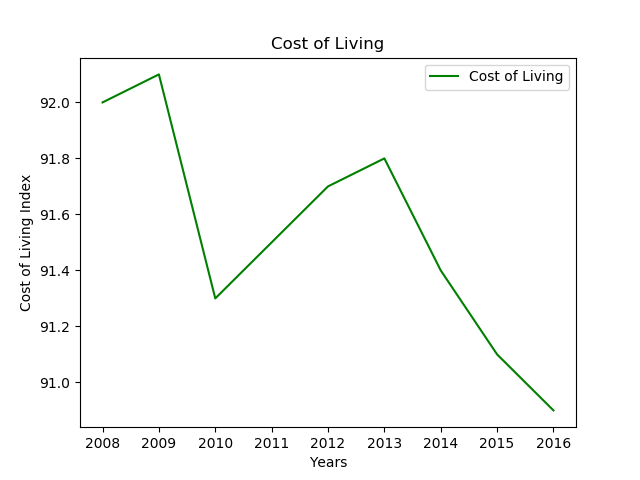

Text(0,0.5,'Cost of Living Index')

In [26]:
# Create a series for the cost of living 
living = cost_of_living.loc[years,["Cost of Goods"]]

# Plot our line 
plt.plot(years, living, color="green", label="Cost of Living")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Cost of Living")
plt.xlabel("Years")
plt.ylabel("Cost of Living Index")
# Show the chart
#plt.show()

In [27]:
plt.savefig("Cost of Living.png")
plt.show()